In this notebook we want to showcase the correctness of the output of algorithm. That is, we want to show that the image which was generated by our algorithm (that we saved as cat_attack.png) is the image of a cat and, simultaneously, has a NeuralHash binary vector equal to that of the image of a dog. That way we can declare that our algorithm has succesfully produce an adversarial image for the NeuralHash, that is it collides with a specific image while still looking like its original image.

In [ ]:
import numpy as np
from PIL import Image
import tensorflow as tf
import onnxruntime as ort
print("runtime", ort.__version__)
import onnx
print("onnx", onnx.__version__)
import onnxsim 
print("simplifier", onnxsim.__version__)
import onnx_graphsurgeon
print("surgeon", onnx_graphsurgeon.__version__)
import simple_onnx_processing_tools
print("processing tools",simple_onnx_processing_tools.__version__)
import tensorflow as tf
print("tensorflow",tf.__version__)
import tf_keras
print("tfkeras",tf_keras.__version__)
import ai_edge_litert
print("ai", ai_edge_litert.__version__)
import psutil
print("psutil", psutil.__version__)
import ml_dtypes
print("ml_dtypes", ml_dtypes.__version__)
import flatbuffers
print("flat", flatbuffers.__version__)
import onnx2tf

In the cell below we recover the NeuralHash model and convert it into tf so that we can use it eagerly on images to attain their Hash.

In [ ]:
model_path="/Users/omaralmutoteh/NeuralHash/model.onnx"
tf_model=onnx2tf.convert(input_onnx_file_path=model_path)

In [8]:
import numpy as np
from PIL import Image

def load_image_tf(path):
    im = Image.open(path).convert('RGB')
    im = im.resize([360, 360])
    arr = np.array(im).astype(np.float32) / 255.0
    arr = arr.reshape([1, 360, 360, 3])
    return arr

def save_image(arr, path):
    arr = arr.reshape([360, 360, 3]) # changes shape of array from (1, 360, 360, 3) to (360, 360, 3)
    arr = (arr) * (255.0)
    arr = arr.astype(np.uint8)
    im = Image.fromarray(arr)
    im.save(path)

def load_seed(path):
    seed = open(path, 'rb').read()[128:]
    seed = np.frombuffer(seed, dtype=np.float32)
    seed = seed.reshape([96, 128])
    return seed

def hash_from_hex(hex_repr):
    n = int(hex_repr, 16)
    h = np.zeros(96)
    for i in range(96):
        h[i] = (n >> (95 - i)) & 1
    return h

def hash_to_hex(h):
    bits = ''.join(['1' if i >= 0.5 else '0' for i in h])
    return '{:0{}x}'.format(int(bits, 2), len(bits) // 4)

def img_to_hex(path):

    matrix=load_seed(seed_path)
    x=load_image_tf(path)
    x=tf_model.predict(x)[0][0][0][0]
    x=np.matmul(matrix, x)
    x=hash_to_hex(x)

    return x

In [11]:
cat_attack_img_path="/Users/omaralmutoteh/Desktop/GitHub/neural-hash-collider/final11.png"
dog_img_path="/Users/omaralmutoteh/Desktop/GitHub/neural-hash-collider/dog.png"
seed_path = "/Users/omaralmutoteh/NeuralHash/neuralhash_128x96_seed1.dat"

The output of the cell below shows us that the hash of the adversial image is equal to that of the dog's image.

In [12]:
hash_cat_attack = img_to_hex(cat_attack_img_path)
hash_dog = img_to_hex(dog_img_path)
hash_dog == hash_cat_attack

1/1 [==============================] - 0s 77ms/step


True

In the cell below we can see that despite the adversarial image's hash being equal to that of the dog's, the image still looks like the image of a cat.

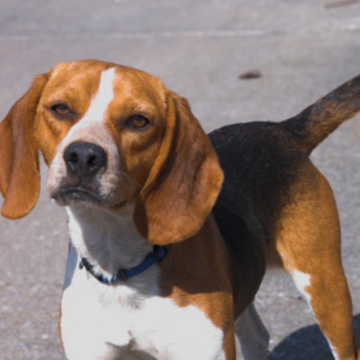

In [16]:
from IPython.display import Image
Image(filename=dog_img_path)  

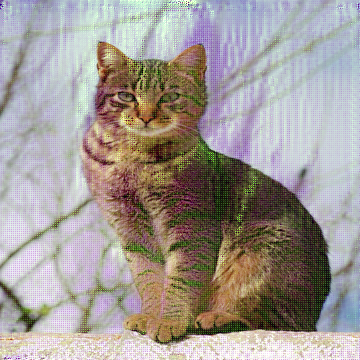

In [17]:
Image(filename=cat_attack_img_path)